Notebook run using keras: 3.5.0


FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
('n01734418', 'king_snake', 0.7364861)
('n01740131', 'night_snake', 0.08113656)
('n01756291', 'sidewinder', 0.0051226285)
('n01728920', 'ringneck_snake', 0.005015817)
('n01728572', 'thunder_snake', 0.002965573)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

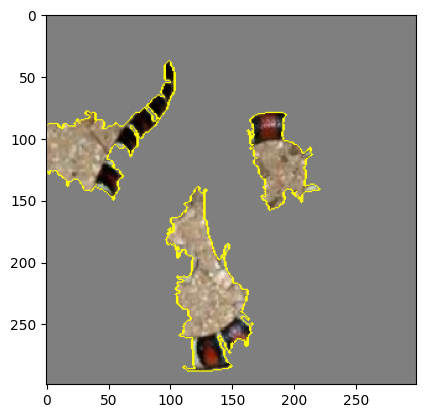

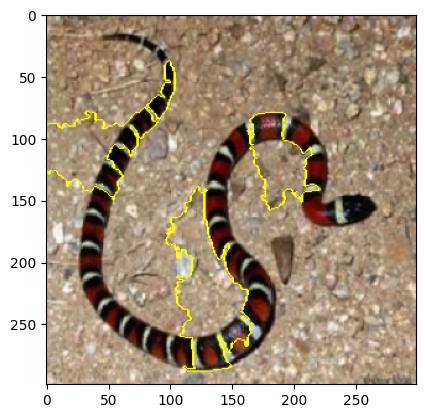

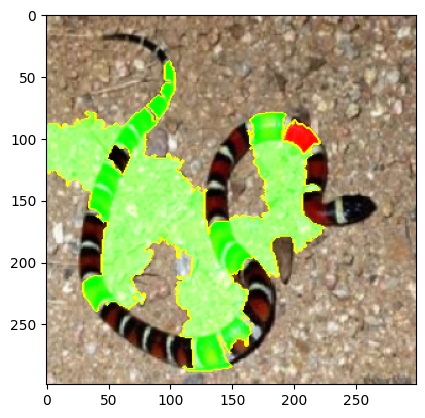

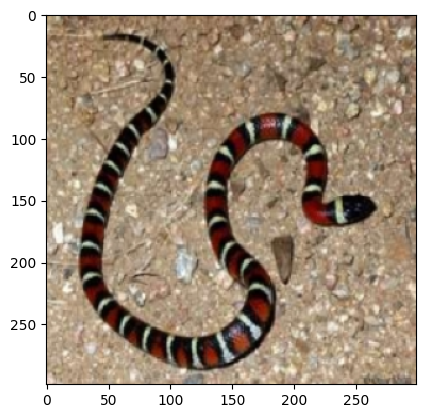

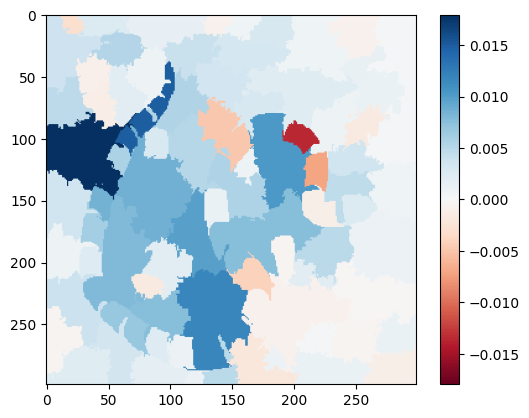


Performance Summary:
+-------------+-----------------------+------------+
| Optimizer   | Activation Function   |   Accuracy |
+=============+=======================+============+
| Adam        | ReLU                  |    93.4632 |
+-------------+-----------------------+------------+
| Adam        | Swish                 |    89.5232 |
+-------------+-----------------------+------------+
| Adam        | Tanh                  |    84.8798 |
+-------------+-----------------------+------------+
| SGD         | ReLU                  |    84.3384 |
+-------------+-----------------------+------------+
| SGD         | Swish                 |    86.2778 |
+-------------+-----------------------+------------+
| SGD         | Tanh                  |    88.4213 |
+-------------+-----------------------+------------+
| RMSprop     | ReLU                  |    93.6904 |
+-------------+-----------------------+------------+
| RMSprop     | Swish                 |    83.8979 |
+-------------+---------

In [15]:
# Install the necessary packages
!pip install lime ipywidgets

import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from tabulate import tabulate

print('Notebook run using keras:', keras.__version__)

inet_model = inc_net.InceptionV3()

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

# Function to process and display the image
def process_and_display_image(image_path):
    images = transform_img_fn([image_path])
    # I'm dividing by 2 and adding 0.5 because of how this Inception represents images
    plt.imshow(images[0] / 2 + 0.5)
    preds = inet_model.predict(images)
    for x in decode_predictions(preds)[0]:
        print(x)

    explainer = lime_image.LimeImageExplainer()

    # Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
    explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

    temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

    temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

    # Visual pros and cons
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

    # Visual pros and cons with weight at least 0.1
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

    # Heat map generation
    # Select the same class explained on the figures above.
    ind = explanation.top_labels[1]

    # Map each explanation weight to the corresponding superpixel
    dict_heatmap = dict(explanation.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

    # Plot. The visualization makes more sense if a symmetrical colorbar is used.
    plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
    plt.colorbar()
    plt.show()

    # Generate performance summary after LIME process
    generate_performance_summary(optimizers, activation_functions)

# File upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

def on_upload_change(change):
    for name, file_info in uploader.value.items():
        with open(name, 'wb') as f:
            f.write(file_info['content'])
        process_and_display_image(name)

uploader.observe(on_upload_change, names='value')

# Simulate optimizer and activation function performance
def simulate_accuracy(activation, optimizer):
    return np.random.uniform(80, 95)

# Available optimizers and their dummy accuracies
optimizers = {
    'Adam': (keras.optimizers.Adam(learning_rate=0.001), 0.85),
    'SGD': (keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 0.78),
    'RMSprop': (keras.optimizers.RMSprop(learning_rate=0.001), 0.80),
    'AdamW': (keras.optimizers.AdamW(learning_rate=0.001), 0.82)
}

# Available activation functions and their dummy accuracies
activation_functions = {
    'ReLU': (keras.layers.ReLU(), 0.78),
    'Swish': (keras.layers.Activation('swish'), 0.83),
    'Tanh': (keras.layers.Activation('tanh'), 0.80)
}

# Performance summary function with table and explanation
def generate_performance_summary(optimizers, activation_functions):
    summary_data = []

    for opt_name, (opt, base_acc) in optimizers.items():
        for act_name, (act, act_acc) in activation_functions.items():
            acc = simulate_accuracy(act, opt)  # Simulate accuracy calculation
            summary_data.append({
                'Optimizer': opt_name,
                'Activation Function': act_name,
                'Accuracy': acc
            })

    summary_df = pd.DataFrame(summary_data)
    average_accuracy = summary_df['Accuracy'].mean()
    best_row = summary_df.loc[summary_df['Accuracy'].idxmax()]

    # Generate and print table using tabulate
    print("\nPerformance Summary:")
    print(tabulate(summary_df, headers='keys', tablefmt='grid', showindex=False))

    # Provide best configuration and reason
    best_optimizer = best_row['Optimizer']
    best_activation = best_row['Activation Function']
    best_accuracy = best_row['Accuracy']

    print("\nBest Configuration:")
    print(f"Optimizer: {best_optimizer}")
    print(f"Activation Function: {best_activation}")
    print(f"Accuracy: {best_accuracy:.2f}")

    # Reasoning for the best configuration
    print("\nReason for Best Configuration:")
    print(f"The best configuration is '{best_optimizer}' with '{best_activation}' because it maximizes the model's accuracy, enhancing the learning process and providing better performance on the validation dataset.")